In [1]:
import os
os.getcwd()

'/Users/Crayon_277/Develop/Project/Python/data-analysis'

# Markdown!! 
## it's really cool

In [3]:
a=10
b=10
c=100
d=100
e=10.0
f=10.0

In [4]:
a is b

True

In [5]:
c is d

True

In [6]:
e is f

False

In [7]:
import graphlab

In [8]:
sf = graphlab.SFrame('people-example.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1473554017.log


This non-commercial license of GraphLab Create for academic use is assigned to chenye277@126.com and will expire on September 08, 2017.


Finished parsing file /Users/Crayon_277/Develop/Project/Python/data-analysis/people-example.csv

Parsing completed. Parsed 7 lines in 0.023827 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Crayon_277/Develop/Project/Python/data-analysis/people-example.csv

Parsing completed. Parsed 7 lines in 0.009307 secs.

In [9]:
sf

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [10]:
sf.show()

Canvas is accessible via web browser at the URL: http://localhost:63038/index.html
Opening Canvas in default web browser.


In [14]:
graphlab.canvas.set_target("ipynb")

In [1]:
sf.show(view='Scatter Plot', x='age',y='age')

NameError: name 'sf' is not defined

In [16]:
sf['age'].show(view='Numeric')

In [17]:
help(sf.show)

Help on method show in module graphlab.data_structures.sframe:

show(self, columns=None, view=None, x=None, y=None) method of graphlab.data_structures.sframe.SFrame instance
    show(columns=None, view=None, x=None, y=None)
    
    Visualize the SFrame with GraphLab Create :mod:`~graphlab.canvas`. This function
    starts Canvas if it is not already running. If the SFrame has already been plotted,
    this function will update the plot.
    
    Parameters
    ----------
    view : str, optional
        The name of the SFrame view to show. Can be one of:
    
        - None: Use the default (depends on which Canvas target is set).
        - 'Table': Show a scrollable, tabular view of the data in the
          SFrame.
        - 'Summary': Show a list of columns with some summary statistics
          and plots for each column.
        - 'Scatter Plot': Show a scatter plot of two numeric columns.
        - 'Heat Map': Show a heat map of two numeric columns.
        - 'Bar Chart': Show a 

In [18]:
sf.show()

In [19]:
sf['Full name'] = sf['First Name'] + sf['Last Name']

In [21]:
def transform_country(cname):
    if cname == 'USA':
        return "United States"
    else:
        return cname
    

In [22]:
sf['Country'].apply(transform_country)

dtype: str
Rows: 7
['United States', 'Canada', 'England', 'United States', 'Poland', 'United States', 'Switzerland']

In [23]:
help(sf.apply)

Help on method apply in module graphlab.data_structures.sframe:

apply(self, fn, dtype=None, seed=None) method of graphlab.data_structures.sframe.SFrame instance
    Transform each row to an :class:`~graphlab.SArray` according to a
    specified function. Returns a new SArray of ``dtype`` where each element
    in this SArray is transformed by `fn(x)` where `x` is a single row in
    the sframe represented as a dictionary.  The ``fn`` should return
    exactly one value which can be cast into type ``dtype``. If ``dtype`` is
    not specified, the first 100 rows of the SFrame are used to make a guess
    of the target data type.
    
    Parameters
    ----------
    fn : function
        The function to transform each row of the SFrame. The return
        type should be convertible to `dtype` if `dtype` is not None.
        This can also be a toolkit extension function which is compiled
        as a native shared library using SDK.
    
    dtype : dtype, optional
        The dtype of 

In [24]:
    .. code-block:: c++
    
        #include <graphlab/sdk/toolkit_function_macros.hpp>
        double mean(const std::map<flexible_type, flexible_type>& dict) {
          double sum = 0.0;
          for (const auto& kv: dict) sum += (double)kv.second;
          return sum / dict.size();
        }
    
        BEGIN_FUNCTION_REGISTRATION
        REGISTER_FUNCTION(mean, "row");
        END_FUNCTION_REGISTRATION
    
    compiled into example.so

SyntaxError: invalid syntax (<ipython-input-24-8892d266ce76>, line 1)

In [25]:
    code-block:: c++
    
        #include <graphlab/sdk/toolkit_function_macros.hpp>
        double mean(const std::map<flexible_type, flexible_type>& dict) {
          double sum = 0.0;
          for (const auto& kv: dict) sum += (double)kv.second;
          return sum / dict.size();
        }
    
        BEGIN_FUNCTION_REGISTRATION
        REGISTER_FUNCTION(mean, "row");
        END_FUNCTION_REGISTRATION
    
    compiled into example.so

SyntaxError: invalid syntax (<ipython-input-25-3d01605bbacc>, line 1)

In [26]:
sf.apply(transform_country)

dtype: dict
Rows: 7
[{'Last Name': 'Smith', 'First Name': 'Bob', 'age': 24, 'Full name': 'BobSmith', 'Country': 'United States'}, {'Last Name': 'Williams', 'First Name': 'Alice', 'age': 23, 'Full name': 'AliceWilliams', 'Country': 'Canada'}, {'Last Name': 'Jone', 'First Name': 'Malcolm', 'age': 22, 'Full name': 'MalcolmJone', 'Country': 'England'}, {'Last Name': 'Brown', 'First Name': 'Felix', 'age': 23, 'Full name': 'FelixBrown', 'Country': 'USA'}, {'Last Name': 'Cooper', 'First Name': 'Alex', 'age': 23, 'Full name': 'AlexCooper', 'Country': 'Poland'}, {'Last Name': 'Campbell', 'First Name': 'Tod', 'age': 22, 'Full name': 'TodCampbell', 'Country': 'United States'}, {'Last Name': 'Ward', 'First Name': 'Derek', 'age': 25, 'Full name': 'DerekWard', 'Country': 'Switzerland'}]

In [27]:
sf['Country'].apply(transform_country,dtype=int)

TypeError: Cannot convert United States to integer

In [1]:
import graphlab

In [2]:
sf = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475049160.log


This non-commercial license of GraphLab Create for academic use is assigned to chenye277@126.com and will expire on September 08, 2017.


In [3]:
sf

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [4]:
graphlab.canvas.set_target('ipynb')
sf.show(view='Scatter Plot',x='sqft_living',y='price')

In [5]:
help(sf.random_split)

Help on method random_split in module graphlab.data_structures.sframe:

random_split(self, fraction, seed=None) method of graphlab.data_structures.sframe.SFrame instance
    Randomly split the rows of an SFrame into two SFrames. The first SFrame
    contains *M* rows, sampled uniformly (without replacement) from the
    original SFrame. *M* is approximately the fraction times the original
    number of rows. The second SFrame contains the remaining rows of the
    original SFrame.
    
    Parameters
    ----------
    fraction : float
        Approximate fraction of the rows to fetch for the first returned
        SFrame. Must be between 0 and 1.
    
    seed : int, optional
        Seed for the random number generator used to split.
    
    Returns
    -------
    out : tuple [SFrame]
        Two new SFrames.
    
    Examples
    --------
    Suppose we have an SFrame with 1,024 rows and we want to randomly split
    it into training and testing datasets with about a 90%/10% split

In [6]:
train_data,test_data = sf.random_split(.8,seed=1)

In [8]:
train_data.show()

In [9]:
help(sf)

Help on SFrame in module graphlab.data_structures.sframe object:

class SFrame(__builtin__.object)
 |  A tabular, column-mutable dataframe object that can scale to big data. The
 |  data in SFrame is stored column-wise on the GraphLab Server side, and is
 |  stored on persistent storage (e.g. disk) to avoid being constrained by
 |  memory size.  Each column in an SFrame is a size-immutable
 |  :class:`~graphlab.SArray`, but SFrames are mutable in that columns can be
 |  added and subtracted with ease.  An SFrame essentially acts as an ordered
 |  dict of SArrays.
 |  
 |  Currently, we support constructing an SFrame from the following data
 |  formats:
 |  
 |  * csv file (comma separated value)
 |  * sframe directory archive (A directory where an sframe was saved
 |    previously)
 |  * general text file (with csv parsing options, See :py:meth:`read_csv()`)
 |  * a Python dictionary
 |  * pandas.DataFrame
 |  * JSON
 |  * Apache Avro
 |  * PySpark RDD
 |  
 |  and from the following s

In [10]:
dir(sf)

['_SFrame__construct_ctr',
 '_SFrame__dropna_errchk',
 '_SFrame__get_graphlabutil_reference_on_spark_unity_jar',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__format__',
 '__get_column_description__',
 '__get_pretty_tables__',
 '__get_staging_dir__',
 '__getattribute__',
 '__getitem__',
 '__has_size__',
 '__hash__',
 '__init__',
 '__is_materialized__',
 '__iter__',
 '__len__',
 '__materialize__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__proxy__',
 '__query_plan_str__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__str_impl__',
 '__subclasshook__',
 '_cache',
 '_group',
 '_imagecols_to_stringcols',
 '_infer_column_types_from_lines',
 '_proxy',
 '_read_csv_impl',
 '_repr_html_',
 '_row_selector',
 '_save_reference',
 'add_column',
 'add_columns',
 'add_row_number',
 'append',
 'apply',
 'column_names',
 'column_types',
 'copy',
 'dropna',


In [11]:
dir(sf.show)

['__call__',
 '__class__',
 '__cmp__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__func__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'im_class',
 'im_func',
 'im_self']

In [12]:
help(sf.show)

Help on method show in module graphlab.data_structures.sframe:

show(self, columns=None, view=None, x=None, y=None) method of graphlab.data_structures.sframe.SFrame instance
    show(columns=None, view=None, x=None, y=None)
    
    Visualize the SFrame with GraphLab Create :mod:`~graphlab.canvas`. This function
    starts Canvas if it is not already running. If the SFrame has already been plotted,
    this function will update the plot.
    
    Parameters
    ----------
    view : str, optional
        The name of the SFrame view to show. Can be one of:
    
        - None: Use the default (depends on which Canvas target is set).
        - 'Table': Show a scrollable, tabular view of the data in the
          SFrame.
        - 'Summary': Show a list of columns with some summary statistics
          and plots for each column.
        - 'Scatter Plot': Show a scatter plot of two numeric columns.
        - 'Heat Map': Show a heat map of two numeric columns.
        - 'Bar Chart': Show a 

In [15]:
graphlab.canvas.set_target('browser')

In [16]:
sf.show()

Canvas is accessible via web browser at the URL: http://localhost:57847/index.html
Opening Canvas in default web browser.


In [17]:
dir(graphlab)

['CustomModel',
 'DeprecationHelper',
 'Edge',
 'Graph',
 'GroupedTimeSeries',
 'Image',
 'Model',
 'SArray',
 'SFrame',
 'SGraph',
 'Sketch',
 'TimeSeries',
 'Vertex',
 '__VERSION__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_beta',
 '_extensions_wrapper',
 '_gl_pickle',
 '_i_am_a_lambda_worker',
 '_internal',
 '_json',
 '_launch',
 '_minipsutil',
 '_mt',
 '_os',
 '_scripts',
 '_stop',
 '_sys',
 'aggregate',
 'anomaly_detection',
 'autotagger',
 'aws',
 'bayesian_changepoints',
 'boosted_trees_classifier',
 'boosted_trees_regression',
 'build_number',
 'canvas',
 'churn_predictor',
 'classifier',
 'clustering',
 'compare',
 'comparison',
 'connect',
 'connect_odbc',
 'connected_components',
 'cross_validation',
 'cy_pylambda_workers',
 'cython',
 'data_matching',
 'data_structures',
 'dbscan',
 'decision_tree_classifier',
 'decision_tree_regression',
 'deduplication',
 'deeplearning',
 'degree_counting',
 'deploy',
 'deps',
 'distances',
 '

In [19]:
help(graphlab.linear_regression)

Help on module graphlab.toolkits.regression.linear_regression in graphlab.toolkits.regression:

NAME
    graphlab.toolkits.regression.linear_regression - Methods for creating and using a linear regression model.

FILE
    /Users/Crayon_277/anaconda2/envs/gl-env/lib/python2.7/site-packages/graphlab/toolkits/regression/linear_regression.py

CLASSES
    graphlab.toolkits._supervised_learning.SupervisedLearningModel(graphlab.toolkits._model.Model)
        LinearRegression
    
    class LinearRegression(graphlab.toolkits._supervised_learning.SupervisedLearningModel)
     |  Linear regression is an approach for modeling a scalar target :math:`y` as
     |  a linear function of one or more explanatory variables denoted :math:`X`.
     |  
     |  Given a set of features :math:`x_i`, and a label :math:`y_i`, linear
     |  regression interprets the probability that the label is in one class as
     |  a linear function of a linear combination of the features.
     |  
     |      .. math::
  

In [20]:
sf

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [21]:
train_model = graphlab.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16407

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.017860     | 4385604.215621     | 2146823.492034       | 258492.332785 | 291163.568160   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [22]:
print train_model.evaluate(test_data)

{'max_error': 4307662.256107476, 'rmse': 266392.07886216906}


In [23]:
help(train_model.evaluate)

Help on method evaluate in module graphlab.toolkits.regression.linear_regression:

evaluate(model, *args, **kwargs) method of graphlab.toolkits.regression.linear_regression.LinearRegression instance
    Evaluate the model by making target value predictions and comparing
    to actual values.
    
    Two metrics are used to evaluate linear regression models.  The first
    is root-mean-squared error (RMSE) while the second is the absolute
    value of the maximum error between the actual and predicted values.
    Let :math:`y` and :math:`\hat{y}` denote vectors of length :math:`N`
    (number of examples) with actual and predicted values. The RMSE is
    defined as:
    
    .. math::
    
        RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (\widehat{y}_i - y_i)^2}
    
    while the max-error is defined as
    
    .. math::
    
        max-error = \max_{i=1}^N \|\widehat{y}_i - y_i\|
    
    Parameters
    ----------
    dataset : SFrame
        Dataset of new observations. Must include 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Crayon_277/anaconda2/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

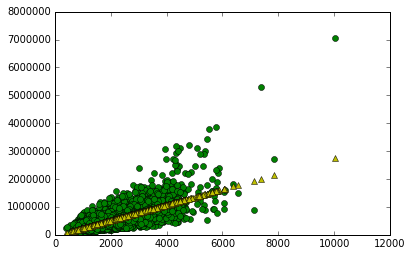

In [26]:
plt.plot(test_data['sqft_living'],test_data['price'],'go',
        test_data['sqft_living'],train_model.predict(test_data),'y^')